# Generating Nodes from Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger
import scipy as sp

sys.path.append("../lightning_modules")

In [3]:
from Point_GAN.utils import generate_polygon, rotate

In [4]:
from torch_geometric.data import Data
from Point_GAN.Models.gan_gnn import GanGNN

In [5]:
with open("Point_GAN_config.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

## Training

In [7]:
model = GanGNN(hparams)

{'aggregation': 'sum_mean', 'input_graph_channels': 16, 'input_node_channels': 16, 'output_channels': 2, 'hidden': 64, 'n_graph_iters': 3, 'nb_node_layer': 3, 'nb_edge_layer': 3, 'output_hidden_activation': 'LeakyReLU', 'gnn_hidden_activation': 'LeakyReLU', 'final_output_activation': None, 'layernorm': True, 'batchnorm': True, 'lr': 0.0005, 'warmup': 50}


In [ ]:
logger = WandbLogger(project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"])
logger.watch(model, log="all")
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger)
trainer.fit(model)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


wandb: logging graph, to disable use `wandb.watch(log_graph=False)`
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Setting up dataset


  0%|          | 0/10000 [00:00<?, ?it/s]/global/cfs/cdirs/m3443/data/GraphGAN/notebooks/../lightning_modules/Point_GAN/utils.py:66: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  FC_edges = torch.combinations(torch.arange(0, N), r=2).T
100%|██████████| 10/10 [00:00<00:00, 951.76it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | generator     | GeneratorGNN     | 111 K 
1 | discriminator | DiscriminatorGNN | 80.4 K
---------------------------------------------------
191 K     Trainable params
0         Non-trainable params
191 K     Total params
0.767     Total estimated model params size (MB)


Validation sanity check:  50%|█████     | 1/2 [00:00<00:00,  9.43it/s]tensor([1., 0., 1., 0.], device='cuda:0')
tensor([0.5540, 0.5551, 0.5466, 0.5585], device='cuda:0')
0.0
                                                                      

/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/global/homes/d/danieltm/.conda/envs/exa/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 whi

Epoch 0:  33%|███▎      | 10/30 [00:01<00:03,  5.12it/s, loss=0.693, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 0: 100%|██████████| 30/30 [00:03<00:00,  7.51it/s, loss=0.693, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.6237, 0.4338, 0.5672, 0.4450, 0.6122, 0.4618, 0.6394, 0.4387, 0.6363,
        0.4689, 0.6494, 0.4698, 0.6386, 0.4530, 0.6531, 0.4252, 0.6061, 0.4415,
        0.6508, 0.6347, 0.6340, 0.4475, 0.5783, 0.4851, 0.5737, 0.4597, 0.6006,
        0.4324, 0.5660, 0.4328, 0.5027, 0.4276, 0.5814, 0.4249, 0.5717, 0.4611,
        0.5064, 0.4517, 0.5403, 0.4784], device='cuda:0')
0.965
Epoch 1:   0%|          | 0/30 [00:00<?, ?it/s, loss=0.693, v_num=tf8g]         

/global/cfs/cdirs/m3443/data/GraphGAN/notebooks/../lightning_modules/Point_GAN/gnn_base.py:177: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(3, 3))


Epoch 1:  33%|███▎      | 10/30 [00:02<00:04,  4.95it/s, loss=0.664, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00, 13.42it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.6254, 0.4837, 0.5784, 0.3152, 0.6192, 0.2747, 0.6361, 0.2795, 0.6218,
        0.3000, 0.6005, 0.2763, 0.6262, 0.2677, 0.6190, 0.3699, 0.6131, 0.3405,
        0.6181, 0.2749, 0.6179, 0.2798, 0.5916, 0.2641, 0.6225, 0.2627, 0.6116,
        0.3018, 0.6170, 0.2885, 0.5008, 0.3061, 0.5984, 0.2849, 0.6127, 0.2546,
        0.5940, 0.2822, 0.5847, 0.2669], device='cuda:0')
1.0
Epoch 2:  33%|███▎      | 10/30 [00:02<00:04,  4.93it/s, loss=0.667, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  6.64it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.

Validating: 100%|██████████| 20/20 [00:01<00:00, 13.79it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.6325, 0.1672, 0.6025, 0.1904, 0.6217, 0.1854, 0.6912, 0.3024, 0.7743,
        0.2244, 0.7607, 0.3598, 0.7107, 0.2082, 0.7718, 0.2636, 0.6595, 0.2309,
        0.7615, 0.1994, 0.7060, 0.2124, 0.5743, 0.1816, 0.4701, 0.1948, 0.6555,
        0.1773, 0.4201, 0.1849, 0.2871, 0.1832, 0.6127, 0.1966, 0.5249, 0.2132,
        0.3893, 0.3263, 0.3499, 0.2139], device='cuda:0')
0.99
Epoch 6:  33%|███▎      | 10/30 [00:01<00:03,  5.07it/s, loss=0.607, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 13.51it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], 

Validating: 100%|██████████| 20/20 [00:02<00:00,  8.43it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5244, 0.3759, 0.4989, 0.2932, 0.5497, 0.5886, 0.6810, 0.4111, 0.6783,
        0.1091, 0.7208, 0.3340, 0.4992, 0.1073, 0.7887, 0.4848, 0.5360, 0.2389,
        0.6160, 0.3025, 0.5155, 0.1730, 0.5111, 0.5783, 0.6229, 0.3744, 0.5572,
        0.0942, 0.4693, 0.3626, 0.3407, 0.2801, 0.6611, 0.3495, 0.5893, 0.6443,
        0.4976, 0.2199, 0.2784, 0.5118], device='cuda:0')
0.8425
Epoch 10:  33%|███▎      | 10/30 [00:02<00:04,  4.79it/s, loss=0.523, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 10: 100%|██████████| 30/30 [00:04<00:00,  7.08it/s, loss=0.523, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,


Validating: 100%|██████████| 20/20 [00:02<00:00,  9.08it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.7479, 0.6234, 0.8089, 0.6611, 0.5614, 0.4081, 0.8936, 0.5176, 0.9041,
        0.5970, 0.8995, 0.4463, 0.7676, 0.3417, 0.9030, 0.3092, 0.8916, 0.5042,
        0.8678, 0.5753, 0.8126, 0.3727, 0.8294, 0.8606, 0.7062, 0.3872, 0.8640,
        0.4601, 0.7367, 0.8070, 0.7069, 0.4834, 0.7019, 0.4131, 0.8042, 0.6349,
        0.7245, 0.5618, 0.6327, 0.7969], device='cuda:0')
0.9
Epoch 14:  33%|███▎      | 10/30 [00:02<00:05,  3.94it/s, loss=0.478, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 12.40it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], 

Validating: 100%|██████████| 20/20 [00:01<00:00, 12.92it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4318, 0.4078, 0.4509, 0.4166, 0.2507, 0.5562, 0.6165, 0.4273, 0.7082,
        0.3466, 0.8141, 0.1743, 0.4326, 0.4691, 0.7353, 0.4865, 0.4633, 0.4192,
        0.6910, 0.5219, 0.4684, 0.3817, 0.3481, 0.5051, 0.4790, 0.4301, 0.4320,
        0.2963, 0.4527, 0.3130, 0.3149, 0.3357, 0.4353, 0.4684, 0.7058, 0.4803,
        0.3642, 0.3740, 0.2939, 0.3372], device='cuda:0')
0.64
Epoch 18:  33%|███▎      | 10/30 [00:01<00:03,  5.07it/s, loss=0.516, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 18: 100%|██████████| 30/30 [00:03<00:00,  7.55it/s, loss=0.516, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
  

Epoch 22:  33%|███▎      | 10/30 [00:02<00:04,  4.56it/s, loss=0.479, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 13.37it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.3538, 0.5455, 0.5364, 0.4241, 0.2422, 0.3018, 0.5623, 0.4549, 0.4842,
        0.6510, 0.7147, 0.2146, 0.4322, 0.1024, 0.6189, 0.3189, 0.6923, 0.3348,
        0.4563, 0.3819, 0.5596, 0.3468, 0.6996, 0.5126, 0.5869, 0.2163, 0.4340,
        0.2033, 0.3080, 0.3757, 0.7910, 0.2245, 0.3158, 0.5047, 0.5831, 0.2790,
        0.6447, 0.6188, 0.4555, 0.2146], device='cuda:0')
0.7825
Epoch 23:  33%|███▎      | 10/30 [00:01<00:03,  5.31it/s, loss=0.51, v_num=tf8g] 
Validating: 0it [00:00, ?it/s]
Epoch 23: 100%|██████████| 30/30 [00:03<00:00,  7.90it/s, loss=0.51, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 

Epoch 26:  33%|███▎      | 10/30 [00:02<00:04,  4.14it/s, loss=0.499, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 12.84it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.3631, 0.3818, 0.4327, 0.2485, 0.1723, 0.6372, 0.4854, 0.1480, 0.4319,
        0.8040, 0.3473, 0.1305, 0.2806, 0.1740, 0.4564, 0.3194, 0.3409, 0.4245,
        0.4693, 0.3042, 0.3461, 0.2762, 0.2913, 0.2076, 0.4491, 0.2179, 0.3152,
        0.5646, 0.3056, 0.3915, 0.5568, 0.1566, 0.2667, 0.1810, 0.4855, 0.3549,
        0.6084, 0.4404, 0.5103, 0.5548], device='cuda:0')
0.6375
Epoch 27:  33%|███▎      | 10/30 [00:02<00:04,  4.82it/s, loss=0.479, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:04<00:00,  3.94it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0

Validating: 100%|██████████| 20/20 [00:01<00:00, 13.10it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5234, 0.5567, 0.3629, 0.4176, 0.5078, 0.5766, 0.7116, 0.8757, 0.7015,
        0.5729, 0.6069, 0.5648, 0.6342, 0.3519, 0.5496, 0.6372, 0.6662, 0.3373,
        0.7148, 0.4551, 0.6096, 0.4669, 0.6337, 0.1281, 0.5086, 0.1342, 0.4466,
        0.0767, 0.5099, 0.5886, 0.6452, 0.4125, 0.4952, 0.6810, 0.7604, 0.2761,
        0.7765, 0.3926, 0.6521, 0.5128], device='cuda:0')
0.75
Epoch 31:  33%|███▎      | 10/30 [00:02<00:04,  4.62it/s, loss=0.513, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  9.49it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.],

Epoch 34: 100%|██████████| 30/30 [00:04<00:00,  6.69it/s, loss=0.45, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5704, 0.5634, 0.7919, 0.4650, 0.4688, 0.5585, 0.8111, 0.5025, 0.7828,
        0.4786, 0.5211, 0.3311, 0.4645, 0.4690, 0.7852, 0.5444, 0.6466, 0.4943,
        0.5898, 0.5290, 0.4380, 0.7320, 0.6302, 0.4806, 0.6353, 0.6971, 0.5613,
        0.4761, 0.5681, 0.3679, 0.7079, 0.6195, 0.5335, 0.4517, 0.6859, 0.6618,
        0.6466, 0.4366, 0.6274, 0.3239], device='cuda:0')
0.7625
Epoch 35:  33%|███▎      | 10/30 [00:04<00:08,  2.36it/s, loss=0.466, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 12.02it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
 

Validating: 100%|██████████| 20/20 [00:02<00:00,  8.71it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4641, 0.4340, 0.7907, 0.1848, 0.3879, 0.5088, 0.5119, 0.2156, 0.7917,
        0.1250, 0.2427, 0.1324, 0.3109, 0.4230, 0.3520, 0.5363, 0.2875, 0.2037,
        0.4396, 0.2579, 0.3363, 0.2923, 0.3479, 0.1102, 0.4552, 0.5448, 0.5563,
        0.2053, 0.4261, 0.4166, 0.4800, 0.4908, 0.3390, 0.5129, 0.5924, 0.4503,
        0.6419, 0.7218, 0.3153, 0.2103], device='cuda:0')
0.6675
Epoch 39:  33%|███▎      | 10/30 [00:02<00:05,  3.85it/s, loss=0.542, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  9.62it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.

Epoch 42: 100%|██████████| 30/30 [00:03<00:00,  7.59it/s, loss=0.545, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4961, 0.6906, 0.4472, 0.5425, 0.3723, 0.3416, 0.6481, 0.5131, 0.9076,
        0.5093, 0.5545, 0.2530, 0.4758, 0.4012, 0.5888, 0.5960, 0.5249, 0.6027,
        0.6845, 0.6533, 0.3483, 0.5084, 0.4196, 0.2278, 0.5131, 0.6542, 0.4829,
        0.7038, 0.5398, 0.6054, 0.4835, 0.4871, 0.4909, 0.4664, 0.6229, 0.6482,
        0.5594, 0.5362, 0.4523, 0.6078], device='cuda:0')
0.4325
Epoch 43:  33%|███▎      | 10/30 [00:02<00:04,  4.87it/s, loss=0.509, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 43: 100%|██████████| 30/30 [00:07<00:00,  4.13it/s, loss=0.509, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.

Validating: 100%|██████████| 20/20 [00:01<00:00, 13.78it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4354, 0.1891, 0.1478, 0.3202, 0.2758, 0.2231, 0.6704, 0.2600, 0.4056,
        0.2766, 0.5159, 0.3016, 0.2280, 0.2771, 0.5268, 0.3499, 0.3551, 0.2996,
        0.4520, 0.1791, 0.3233, 0.3579, 0.4396, 0.2361, 0.2572, 0.1798, 0.2056,
        0.2110, 0.2852, 0.2337, 0.3177, 0.3413, 0.2133, 0.2708, 0.4411, 0.4172,
        0.3303, 0.2457, 0.3386, 0.4384], device='cuda:0')
0.6875
Epoch 47:  33%|███▎      | 10/30 [00:02<00:04,  4.60it/s, loss=0.514, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 47: 100%|██████████| 30/30 [00:04<00:00,  7.45it/s, loss=0.514, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,


Epoch 50: 100%|██████████| 30/30 [00:03<00:00,  7.81it/s, loss=0.566, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4995, 0.1913, 0.7492, 0.4473, 0.4435, 0.0917, 0.6820, 0.5086, 0.7080,
        0.3692, 0.5806, 0.3944, 0.6033, 0.2351, 0.5611, 0.2994, 0.5631, 0.5317,
        0.5558, 0.3199, 0.5775, 0.4818, 0.7236, 0.3258, 0.5388, 0.4127, 0.6086,
        0.4302, 0.4332, 0.6855, 0.5253, 0.5290, 0.5135, 0.5858, 0.7387, 0.4093,
        0.4767, 0.3514, 0.5386, 0.4264], device='cuda:0')
0.875
Epoch 51:  33%|███▎      | 10/30 [00:01<00:03,  5.08it/s, loss=0.45, v_num=tf8g] 
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
 

Validating: 100%|██████████| 20/20 [00:05<00:00,  6.12it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5216, 0.2508, 0.6843, 0.4044, 0.3833, 0.3166, 0.6966, 0.1000, 0.6675,
        0.5782, 0.7487, 0.3661, 0.3201, 0.2593, 0.7967, 0.3040, 0.2848, 0.4991,
        0.5763, 0.4719, 0.5990, 0.2662, 0.3018, 0.2640, 0.5834, 0.3983, 0.3431,
        0.4454, 0.6036, 0.3206, 0.5409, 0.4098, 0.3359, 0.3990, 0.9074, 0.3696,
        0.4407, 0.2714, 0.4564, 0.3010], device='cuda:0')
0.81
Epoch 55:  33%|███▎      | 10/30 [00:02<00:04,  4.25it/s, loss=0.436, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 13.07it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.],

Validating: 100%|██████████| 20/20 [00:01<00:00, 13.35it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4850, 0.4736, 0.3824, 0.4097, 0.5607, 0.4761, 0.7745, 0.3556, 0.3617,
        0.3033, 0.2000, 0.5252, 0.3946, 0.3013, 0.8009, 0.3251, 0.3449, 0.3346,
        0.4356, 0.7571, 0.3794, 0.4439, 0.4602, 0.5436, 0.4668, 0.4769, 0.3255,
        0.3350, 0.6651, 0.4721, 0.4596, 0.3241, 0.4276, 0.5481, 0.8530, 0.2581,
        0.4186, 0.3843, 0.4941, 0.4635], device='cuda:0')
0.5974999999999999
Epoch 59:  33%|███▎      | 10/30 [00:02<00:04,  4.95it/s, loss=0.421, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 59: 100%|██████████| 30/30 [00:04<00:00,  7.26it/s, loss=0.421, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 

Epoch 62: 100%|██████████| 30/30 [00:04<00:00,  7.32it/s, loss=0.579, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5802, 0.4931, 0.4614, 0.5182, 0.5492, 0.6166, 0.8274, 0.5451, 0.7176,
        0.5086, 0.6693, 0.5630, 0.5435, 0.5335, 0.8111, 0.6038, 0.4959, 0.5052,
        0.6361, 0.4947, 0.6543, 0.5599, 0.5077, 0.6984, 0.6173, 0.5196, 0.4836,
        0.5954, 0.5835, 0.5443, 0.5695, 0.6190, 0.5438, 0.4937, 0.7829, 0.5529,
        0.5889, 0.4804, 0.5619, 0.6073], device='cuda:0')
0.6575
Epoch 63:  33%|███▎      | 10/30 [00:01<00:03,  5.32it/s, loss=0.545, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 63: 100%|██████████| 30/30 [00:03<00:00,  7.87it/s, loss=0.545, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.

Epoch 66: 100%|██████████| 30/30 [00:03<00:00,  8.10it/s, loss=0.47, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.3741, 0.4686, 0.4397, 0.9408, 0.3704, 0.5197, 0.4483, 0.2657, 0.3544,
        0.7698, 0.4764, 0.1222, 0.2352, 0.3883, 0.5170, 0.1516, 0.3188, 0.3277,
        0.3146, 0.3383, 0.2972, 0.2027, 0.4845, 0.4112, 0.2521, 0.6709, 0.3400,
        0.1944, 0.2563, 0.4653, 0.4751, 0.3729, 0.2781, 0.5073, 0.5261, 0.5374,
        0.4177, 0.1732, 0.3974, 0.2116], device='cuda:0')
0.5075000000000001
Epoch 67:  33%|███▎      | 10/30 [00:01<00:03,  5.25it/s, loss=0.443, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Epoch 67: 100%|██████████| 30/30 [00:08<00:00,  3.65it/s, loss=0.443, v_num=tf8g]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,

Epoch 71:  33%|███▎      | 10/30 [00:01<00:03,  5.01it/s, loss=0.428, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.4204, 0.2652, 0.3733, 0.3890, 0.2944, 0.1916, 0.8104, 0.4755, 0.1929,
        0.1480, 0.3377, 0.3197, 0.2137, 0.2002, 0.7785, 0.3854, 0.2199, 0.2304,
        0.3029, 0.1928, 0.3527, 0.1722, 0.3370, 0.4845, 0.4051, 0.4485, 0.2782,
        0.2042, 0.5532, 0.4037, 0.4313, 0.3219, 0.4215, 0.2912, 0.8361, 0.4516,
        0.3821, 0.5377, 0.2730, 0.1880], device='cuda:0')
0.6425
Epoch 72:  33%|███▎      | 10/30 [00:02<00:04,  4.16it/s, loss=0.457, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:01<00:00, 13.36it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0

Epoch 75:  33%|███▎      | 10/30 [00:02<00:04,  4.79it/s, loss=0.402, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00,  7.86it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.], device='cuda:0')
tensor([0.5276, 0.0855, 0.2475, 0.3028, 0.3073, 0.2193, 0.8014, 0.5027, 0.3662,
        0.4523, 0.3601, 0.2828, 0.3037, 0.1663, 0.7315, 0.4131, 0.2031, 0.4897,
        0.3427, 0.2649, 0.3556, 0.6203, 0.2202, 0.2808, 0.4670, 0.0307, 0.1898,
        0.3764, 0.4403, 0.3381, 0.2875, 0.2816, 0.5673, 0.3112, 0.7269, 0.2464,
        0.3360, 0.4058, 0.4608, 0.2044], device='cuda:0')
0.6525000000000001
Epoch 76:  33%|███▎      | 10/30 [00:02<00:04,  4.20it/s, loss=0.398, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating: 100%|██████████| 20/20 [00:02<00:00, 11.14it/s]tensor([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1

Epoch 79:  33%|███▎      | 10/30 [00:02<00:04,  4.11it/s, loss=0.442, v_num=tf8g]
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
model.setup(stage="fit")

Setting up dataset


  0%|          | 0/200 [00:00<?, ?it/s]/global/cfs/cdirs/m3443/data/GraphGAN/notebooks/../lightning_modules/Point_GAN/utils.py:66: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  FC_edges = torch.combinations(torch.arange(0, N), r=2).T
100%|██████████| 10/10 [00:00<00:00, 596.34it/s]


In [10]:
for batch in model.train_dataloader():
    print(batch)
    break

Batch(batch=[800], edge_attr=[1200], edge_index=[2, 1200], ptr=[201], x=[800, 2], y=[200])


## Visualise Examples

In [12]:
from matplotlib.pyplot import cm

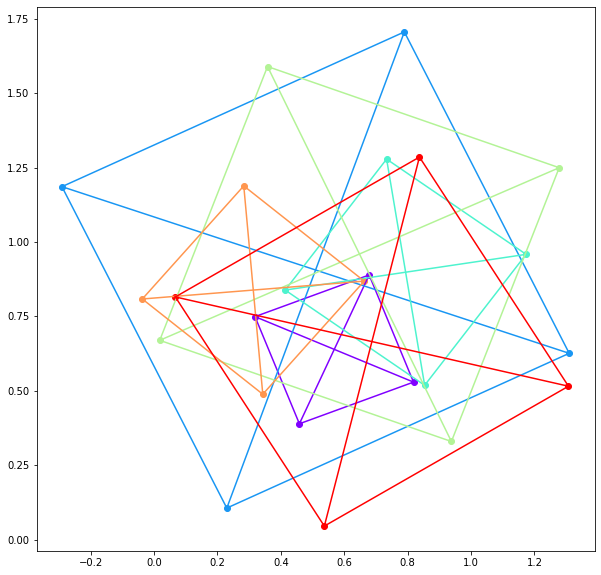

In [13]:
n=6

color = iter(cm.rainbow(np.linspace(0, 1, n)))

plt.figure(figsize=(10,10))
for polygon in model.valset[:n]:
    c = next(color)
    plt.scatter(polygon.x.T[0], polygon.x.T[1], color=c);
    plt.plot(polygon.x[:, 0][polygon.edge_index], polygon.x[:, 1][polygon.edge_index], c=c); 
    